#### Inciso 1
En este primer bloque de código se importó el archivo "A1.6TiempodeEntrega.csv" utilizando la función read de la librería pandas. Al analizar los datos, se identificaron ciertos valores no numéricos en la variable Calificación, por lo que se aplicó la función to_numeric a dicha columna, especificando el parámetro errors="coerce", lo que convirtió esos valores inválidos en NaN. Posteriormente, dichos registros fueron eliminados con la función dropna.

Después, y considerando el contexto del problema, se eliminaron los datos cuyo tiempo superaba una semana (168 horas), ya que las tareas se realizaban dentro de ese periodo. Posteriormente, se aplicó un análisis de Tukey para detectar valores atípicos (k=3) y se imprimieron los casos identificados. En este proceso se encontró un tiempo negativo, por lo que únicamente se eliminó ese dato específico y se conservaron los demás.

Finalmente, con los datos ya depurados, se utilizó la función scatter de matplotlib.pyplot para generar un gráfico de dispersión, en el cual el eje x representa el tiempo restante antes de la entrega y el eje y corresponde a la calificación obtenida.

         Tiempo  Calificacion
0     85.076389        85.000
1     84.675556        85.000
2     79.553889       110.000
3     75.310556       110.000
4     64.958611       110.000
5     58.157778       110.000
6     56.238611       110.000
7     55.903056       110.000
8     52.465556       103.000
9     51.998333        96.000
27    76.101944       110.000
28    65.141667       110.000
54   124.434722       110.000
55    82.725278       110.000
56    79.490278       110.000
57    77.231111       110.000
58    57.590556       110.000
59    54.765833       110.000
81   132.637500       110.000
82    54.129444        80.000
83    52.095833        70.000
84    50.952500       110.000
107 -100.000000         0.000
109   79.073889       110.000
110   61.739722       110.000
111   52.792222        55.000
112   45.039722        66.000
139   78.876944       110.000
162   79.490000       110.000
163   52.315278       110.000
164   49.581667       110.000
189   80.220833       105.415
190   53.3

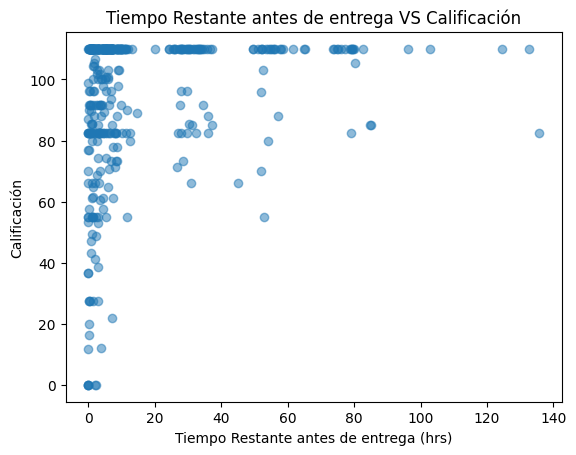

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv("A1.6TiempodeEntrega.csv")
df['Calificacion'] = pd.to_numeric(df['Calificacion'], errors='coerce')
df = df.dropna(subset=['Calificacion']) # Eliminación de datos sin información en calificación
df = df[df['Tiempo'] <= 168] # Límite a una semana antes de la entrega, es decir 168 horas
q1=df.Tiempo.quantile(0.25)
q3=df.Tiempo.quantile(0.75)
iqr=q3-q1
li=q1-(3*iqr)
ls=q3+(3*iqr)
out=np.where((df.Tiempo<=li) | (df.Tiempo>=ls))[0]
print(df.iloc[out,:]) # Identificación de outliers
df = df.drop([107]) # Eliminación de datos con Tiempo negativo

plt.scatter(df.Tiempo, df.Calificacion, alpha=0.5)
plt.xlabel('Tiempo Restante antes de entrega (hrs)')
plt.ylabel('Calificación')
plt.title('Tiempo Restante antes de entrega VS Calificación')
plt.show()

Considero que para esta tarea el mejor modelo será el segmentado ya que , en mi opinión, representará de mejor manera los datos vistos en el gráfico de dispersión

#### Inciso 2
En este bloque de código se realiza la separación de los datos en conjuntos de entrenamiento y prueba con una proporción de 70/30, utilizando la función train_test_split de la librería sklearn.model_selection. Posteriormente, se calcularon los promedios tanto del tiempo como de la calificación en cada uno de los conjuntos de datos, utilizando la función mean de numpy.

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(df.Tiempo,df.Calificacion,train_size = 0.7)
print("Promedio para datos de entrenamiento:")
print("Tiempo", np.mean(X_train))
print("Calificación", np.mean(Y_train))
print()
print("Promedio para datos de prueba:")
print("Tiempo", np.mean(X_test))
print("Calificación", np.mean(Y_test))

Promedio para datos de entrenamiento:
Tiempo 15.1663444822483
Calificación 95.43829047619047

Promedio para datos de prueba:
Tiempo 14.124867724714287
Calificación 93.30225650793652


Analizando los promedios tanto de tiempo como de calificación en los conjuntos de entrenamiento y prueba, se puede apreciar que son relativamente similares. Esto resulta favorable para el análisis, ya que indica que hubo una adecuada distribución de los datos, evitando un sesgo en los resultados.

#### Inciso 3
En este bloque se aplicó un modelo de regresión polinomial de grado 2 para analizar la relación entre tiempo y calificación. Primero, se utilizó reshape(-1,1) para transformar los vectores de entrenamiento y prueba en arreglos bidimensionales, requisito necesario para trabajar con PolynomialFeatures.

Posteriormente, se generaron las variables cuadráticas de ambos conjuntos y se transformaron en DataFrames para facilitar su manejo. Con la librería statsmodels.api se ajustó un modelo OLS  a los datos de entrenamiento y, finalmente, se imprimió el resumen del modelo con summary() y se generaron las estimaciones con predict.

In [10]:
from sklearn.preprocessing import PolynomialFeatures
import statsmodels.api as sm
X_train_r = X_train.array.reshape(-1,1)
X_test_r = X_test.array.reshape(-1,1)
polyq_train = PolynomialFeatures(degree=2).fit(X_train_r)
polyq_test = PolynomialFeatures(degree=2).fit(X_test_r)
Xq_train = pd.DataFrame(polyq_train.transform(X_train_r))
Xq_test = pd.DataFrame(polyq_test.transform(X_test_r))
mq = sm.OLS(list(Y_train),Xq_train).fit()
print(mq.summary())
yHat_mq = mq.predict(Xq_test)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.052
Model:                            OLS   Adj. R-squared:                  0.046
Method:                 Least Squares   F-statistic:                     8.015
Date:                Mon, 01 Sep 2025   Prob (F-statistic):           0.000409
Time:                        04:37:13   Log-Likelihood:                -1332.1
No. Observations:                 294   AIC:                             2670.
Df Residuals:                     291   BIC:                             2681.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
0             90.7529      1.790     50.694      0.0

De acuerdo con los coeficientes del modelo, se observa una relación positiva entre el tiempo restante antes de la entrega y la calificación, ya que el coeficiente lineal es positivo. Sin embargo, el coeficiente cuadrático es negativo, lo que confirma que el modelo tiene una forma cóncava hacia abajo. Esto significa que a mayor tiempo antes de la entrega, mayor la calificación hasta cierto punto máximo.

Por otro lado, dado que el p-value asociado a la variable tiempo es menor a 0.05, se puede concluir que el tiempo restante antes de la entrega esta significativamente asociado con las calificaciones.

#### Inciso 4
En este bloque de código se aplicó el modelo PiecewiseRegressor de la librería mlinsights, el cual permite ajustar la relación entre las variables dividiendo los datos en diferentes tramos o segmentos. Posteriormente se generaron las predicciones correpondientes al modelo.

In [11]:
from mlinsights.mlmodel import PiecewiseRegressor
ms = PiecewiseRegressor('bins').fit(Xq_train.iloc[:,1:],Y_train)
yHat_ms = ms.predict(Xq_test.iloc[:,1:])

#### Inciso 5
En este bloque de código se utilizó el modelo K-Nearest Neighbors Regressor (KNN) de la librería sklearn. Se configuró con 15 vecinos (n_neighbors=15) y se entrenó con los datos de entrenamiento. Finalmente, se generaron las predicciones sobre los datos de prueba.

In [12]:
from sklearn.neighbors import KNeighborsRegressor as KNN
mk = KNN(n_neighbors=15).fit(X_train_r,Y_train)
yHat_mk = mk.predict(X_test_r)

#### Inciso 6
En este bloque de código se calcularon los valores de RSS (Residual Sum of Squares) y RSE (Residual Standard Error) para cada uno de los modelos implementados: cuadrático, segmentado y KNN.

In [13]:
RSS_mq = sum((list(Y_test)-yHat_mq)**2)
RSE_mq = np.sqrt(RSS_mq/(len(Y_test)-1))
RSS_ms = sum((list(Y_test)-yHat_ms)**2)
RSE_ms = np.sqrt(RSS_ms/(len(Y_test)-1))
RSS_mk = sum((list(Y_test)-yHat_mk)**2)
RSE_mk = np.sqrt(RSS_mk/(len(Y_test)-1))
print("RSE modelo cuadrático: ",RSE_mq)
print("RSE modelo segmentado: ",RSE_ms)
print("RSE modelo KNN: ",RSE_mk)

RSE modelo cuadrático:  24.699555956509492
RSE modelo segmentado:  24.15992962064733
RSE modelo KNN:  23.905995899447827


En este caso, el modelo con menor RSE resultó ser KNN; sin embargo, dependiendo de la selección de datos, el valor del RSE puede variar entre los diferentes modelos, ya que sus resultados no varían demasiado. Aun así, considerando que estamos tratando de predecir calificaciones en un rango de 0 a 110, un RSE de 23 o 24 sigue siendo bastante alto, por lo que no sería adecuado afirmar que alguno de los modelos es claramente mejor que los demás en este contexto.
Desde otra perspectiva, si tomamos en cuenta la interpretabilidad, el modelo cuadrático resulta el más claro y sencillo de comprender, seguido por el segmentado. Por lo tanto, si el objetivo principal es entender el comportamiento del modelo y no únicamente minimizar el error, el cuadrático podría ser una mejor opción.

#### Inciso 7
En este último bloque de código se graficaron las calificaciones predichas por los tres modelos (cuadrático, segmentado y KNN) con las calificaciones reales de prueba (Y_test). Para diferenciarlos, cada modelo se representó con un color distinto.

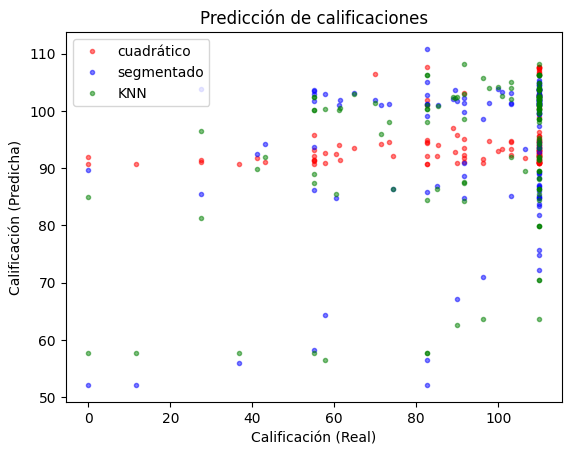

In [16]:
plt.plot(Y_test,yHat_mq,"r.",label="cuadrático", alpha=0.5)
plt.plot(Y_test,yHat_ms,"b.",label="segmentado", alpha=0.5)
plt.plot(Y_test,yHat_mk,"g.",label="KNN", alpha=0.5)
plt.title("Predicción de calificaciones")
plt.xlabel("Calificación (Real)")
plt.ylabel("Calificación (Predicha)")
plt.legend()
plt.show()

En este gráfico se puede apreciar cómo el modelo cuadrático tiene valores más constantes o menos dispersos en comparación con el modelo segmentado y el KNN.Sin embargo, esto trae desventajas. Como se puede ver en las calificaciones más bajas, el modelo cuadrático muestra predicciones menos precisas, mientras que los otros dos modelos logran ajustarse mejor y predecir de una manera más exacta (aunque aún con errores).